Prevendo Esgotamento dos Funcionários 



![](https://sertms.com/wp-content/uploads/2020/10/post_thumbnail-327dbe80b7dac1312e066b24a6e678bd.jpg) 


De acordo com uma pesquisa anônima, cerca de **450 milhões de pessoas vivem com transtornos mentais** que podem ser uma das principais causas de problemas de saúde e deficiência em todo o mundo.

* Fatores que de fato podem contribuir com o **Burnout**

O stress eh uma resposta emocional derivada de diversas contigencias, envolvido tambem com questoes quimicas e nao esta ligado apenas ao trabalho e sim com uma serie de habitos.
Habitos alimentares, de lazer, exercicios fisicos e como essa pessoa consegue equilibrar os diversos setores da vida dela com o trabalho. O homeoffice tem provocado o burnout, e um dos principais motivos eh que a maioria das pessoas acabam focando mais ao trabalho e deixando outras areas da vida em desatencao. Muitas delas nao conseguem diferenciar os momentos de trabalho com os momentos de lazer dentro de casa e acaba misturando esses dois fatores, assim deixando de fazer coisas que se consideram secundarias e colocam o trabalho a frente descuidando da sua vida pessoal. Outro fator vinculado ao burnout eh que as pessoas por medo de perderem o emprego durante a pandemia, querem mostrar mais produtivas, mais eficientes e que merecem estar em uma determinada empresa e assim garantindo a permanencia no emprego. Isso contribui pra que se desliguem mais da vida pessoal com a familia e se dediquem mais ao trabalho. Outros fatores que podem identificar se uma pessoa tem risco de sofrer burnout eh analisando o ciclo de amizades, se ela tem amigos que nao estao vinculados a empresa onde trabalha, se tem momentos saudaveis de lazer que nao seja somente sair pra ingerir substancias toxicas, como o consumo de alcool por exemplo. Se essa pessoa tem uma alimentacao adequada, se pratica exercicios fisicos, se ela tem um salario que possa satisfazer suas necessidades, o tipo de cargo que essa pessoa ocupa, se tem um cargo de lider que se responsabiliza por outras pessoas, se tem uma carga horaria fixa ou flexivel.
Pessoas de diferentes classes podem sofrer o burnout, como por exemplo uma pessoa que tem um cargo elevado como ser responsavel por outras pessoas, que tem sempre a necessidade de estar atento e gerenciando alguem ou alguma atividade, assim tambem como uma pessoa que tem um cargo mais baixo que as vezes tem uma sobrecarga alta impedindo que tenha tempo pra familia e pros amigos, um salario que nao atende suas necessidades e objetivos, a falta de valorizacao, o fato de nao ter tempo ou condicoes de ter um lazer adequado.

Dra. Debora Macedo


#1° Problema de Negócio


![](https://media.giphy.com/media/l46CeDBwmtMi1ddkc/giphy.gif)

#### **Prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos**, ajudando assim a empresa a tomar as medidas adequadas para a saúde Mental dos seus colaboradores.


#### Iniciativa: 
https://link.springer.com/article/10.1007/s10560-020-00733-w

### Análise Exploratória dos Dados


#### Fontes:
https://www.kaggle.com/redwankarimsony/hackerearth-employee-burnout-challenge

![](https://cienciadosdados.com/images/2021/ad_rh.png)

In [86]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.offline as py
import seaborn as sns
from sklearn.model_selection import  train_test_split
from pycaret.regression import *
import sweetviz as sv

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor as gbtr
from sklearn.neighbors import KNeighborsRegressor as kr

# Avaliação da Máquina Preditiva
from sklearn.metrics import mean_squared_error, r2_score
import math

In [87]:
# Importando o dataset
df = pd.read_csv("/home/eduardo/cienciadosdados/Prevendo Esgotamento de Funcionários - BURNOUT/RH_Data_Fatige.csv",sep = ",")

In [88]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


### Renomeando as colunas

In [89]:
df.rename(columns={'Employee ID': 'Employee_ID', 
                   'Date of Joining': 'Date_of_Joining', 
                   'Gender':'Gender', 
                   'Company Type':'Company_Type', 
                   'WFH Setup Available':'WFH_Setup_Available', 
                   'Designation':'Designation', 
                   'Resource Allocation':'Resource_Allocation', 
                   'Mental Fatigue Score':'Mental_Fatigue_Score', 
                   'Burn Rate':'Burn_Rate'}, inplace=True)


In [90]:
df

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_ID           22750 non-null  object 
 1   Date_of_Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company_Type          22750 non-null  object 
 4   WFH_Setup_Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource_Allocation   21369 non-null  float64
 7   Mental_Fatigue_Score  20633 non-null  float64
 8   Burn_Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [92]:
df.isna().sum()

Employee_ID                0
Date_of_Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

In [93]:
#Null Value Imputation
rev_null=['Resource_Allocation','Mental_Fatigue_Score','Burn_Rate']
df[rev_null]=df[rev_null].replace({np.nan:df['Resource_Allocation'].mean(),
                                   np.nan:df['Burn_Rate'].mean(),
                                   np.nan:df['Mental_Fatigue_Score'].mean(),
                                   })

In [94]:
df.isnull().sum()

Employee_ID             0
Date_of_Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
Burn_Rate               0
dtype: int64

In [95]:
my_report = sv.analyze(df, 'Mental_Fatigue_Score')
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


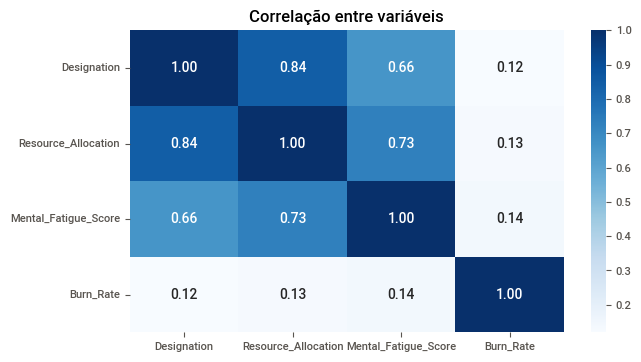

In [96]:
plt.subplots(figsize=(7, 4))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()

In [97]:
cf.go_offline()

In [98]:
#A maior parte dos funcionarios sao do sexo feminino.
df.Gender.value_counts().iplot(kind='bar', color='red')

In [99]:
#A empresa é mais voltada para serviços.
df.Company_Type.value_counts().iplot(kind='bar', color='blue')

In [100]:
#O grafico mostra que a maior parte dos trabalhos sao homeoffice.
wfh =  df.WFH_Setup_Available.value_counts().iplot(kind='bar', color='orange')

In [101]:
#Nivel de antiguidade dos funcionarios na empresa.
df.Designation.value_counts().iplot(kind='bar', color='lightgreen')

In [102]:
#Total de horas trabalhadas por dia.
df.Resource_Allocation.value_counts().iplot(kind='bar', color='purple')

### Principais fatores que contribuem para o BURNOUT:
* Nivel de antiguidade do funcionario, quanto mais tempo esta na empresa, mais tende
a sofrer burnout.
* Quando nao ha um ambiente de trabalho adequado para quem trabalha homeoffice.

### Pré-Processamento dos Dados

In [104]:
#function to find out total days
def create_days_count(data):
    return (current_date - data["Date_of_Joining"])

In [105]:
#Converting date of joining column to pandas datetime format
df["Date_of_Joining"] = pd.to_datetime(df["Date_of_Joining"])

#### Engenharia de Atributos - Criando campo "dias de trabalho"

In [106]:
#get todays date time
current_date = pd.to_datetime('today')  
#Creating new column days_count
df["days_count"] = df.apply(create_days_count, axis=1).dt.days

In [107]:
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,days_count
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.000000,3.8,0.16,4988
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.000000,5.0,0.36,4927
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,5.728188,5.8,0.49,5192
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.000000,2.6,0.20,4954
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.000000,6.9,0.52,5056


#### LabelEncoder - Variáveis não numéricas

In [108]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [109]:
df['Company_Type']=df['Company_Type'].map({'Service':1,'Product':0})

In [110]:
df['WFH_Setup_Available']=df['WFH_Setup_Available'].map({'Yes':1,'No':0})

In [111]:
df.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,days_count
0,fffe32003000360033003200,2008-09-30,0,1,0,2.0,3.000000,3.8,0.16,4988
1,fffe3700360033003500,2008-11-30,1,1,1,1.0,2.000000,5.0,0.36,4927
2,fffe31003300320037003900,2008-03-10,0,0,1,2.0,5.728188,5.8,0.49,5192
3,fffe32003400380032003900,2008-11-03,1,1,1,1.0,1.000000,2.6,0.20,4954
4,fffe31003900340031003600,2008-07-24,0,1,0,3.0,7.000000,6.9,0.52,5056


In [112]:
df.describe()

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,days_count
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,0.476571,0.652000,0.540220,2.178725,4.557083,5.728188,0.712684,5078.605495
std,0.499462,0.476346,0.498391,1.135145,2.006312,1.829281,1.159673,105.348190
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4896.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.700000,0.320000,4988.000000
50%,0.000000,1.000000,1.000000,2.000000,5.000000,5.728188,0.470000,5078.000000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,6.900000,0.610000,5170.000000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,5.728188,5261.000000


### Eliminando Variáveis que não são explicativas para a previsão

In [113]:
df.drop(["Employee_ID","Date_of_Joining"],axis=1, inplace=True)

In [114]:
df

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate,days_count
0,0,1,0,2.0,3.000000,3.800000,0.16,4988
1,1,1,1,1.0,2.000000,5.000000,0.36,4927
2,0,0,1,2.0,5.728188,5.800000,0.49,5192
3,1,1,1,1.0,1.000000,2.600000,0.20,4954
4,0,1,0,3.0,7.000000,6.900000,0.52,5056
...,...,...,...,...,...,...,...,...
22745,0,1,0,1.0,3.000000,5.728188,0.41,4897
22746,0,0,1,3.0,6.000000,6.700000,0.59,5243
22747,1,1,1,3.0,7.000000,5.728188,0.72,4952
22748,0,1,0,2.0,5.000000,5.900000,0.52,5252


In [115]:
#criando variáveis ​​independentes como X e variável alvo / dependente como y
y= df.pop("Mental_Fatigue_Score")
X= df

### Fazendo a Amostragem dos Dados - Partition

In [116]:
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

#get shape of train and test data
print("train data size:",X_train.shape)
print("test data size:",X_test.shape)

train data size: (18200, 7)
test data size: (4550, 7)


### Construíndo a Máquina Preditiva 


In [117]:
#build model
#xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
#gbtr_model = GradientBoostingRegressor(n_estimators=100)

In [118]:
# treinamento
lgb_model.fit(X_train, y_train)
#xgb_model.fit(X_train, y_train)
#gbtr_model.fit(X_train, y_train)


LGBMRegressor()

In [119]:
y_predict= lgb_model.predict(X_test)
#y_predict= xgb_model.predict(X_test)
#y_predict= gbtr_model.predict(X_test)

### Avaliação da Máquina Preditiva

In [120]:
# Calcula a métrica R2 do nosso modelo
#r2_score(y_test, y_predict)
r2_score(y_test, lgb_model.fit(X_train, y_train).predict(X_test))
#r2_score(y_test, gbtr_model.fit(X_train, y_train).predict(X_test))

0.8055738897363371

### Tivemos uma acuracia de mais de 81%, o que pode ser melhorado com uma tunagem do modelo